In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
bitcoin = pd.read_csv("BTC-USD.csv", index_col='Date', parse_dates=True)
bitcoin.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


<AxesSubplot: xlabel='Date'>

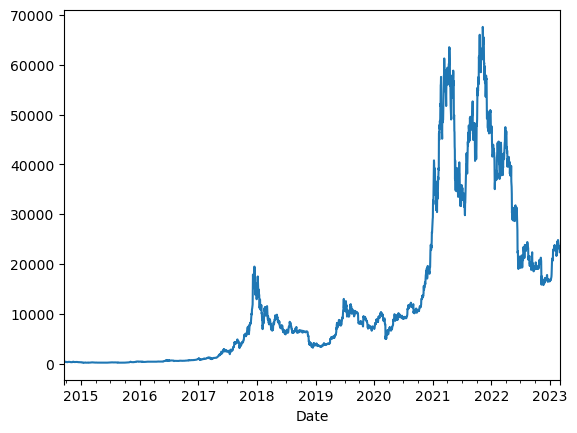

In [3]:
bitcoin['Close'].plot()

/tmp/ipykernel_580205/3915306031.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  bitcoin['2022']['Close'].plot()


<AxesSubplot: xlabel='Date'>

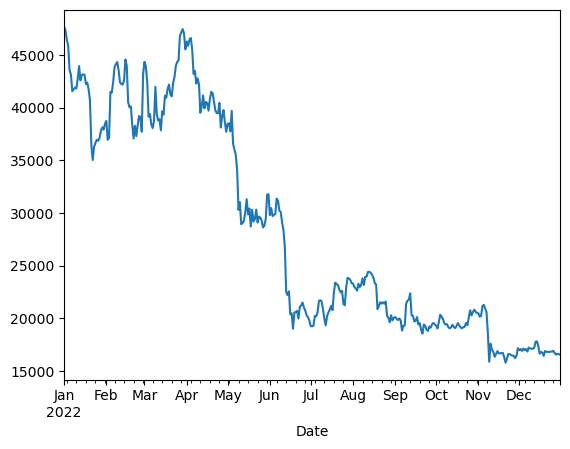

In [4]:
bitcoin['2022']['Close'].plot()

<AxesSubplot: xlabel='Date'>

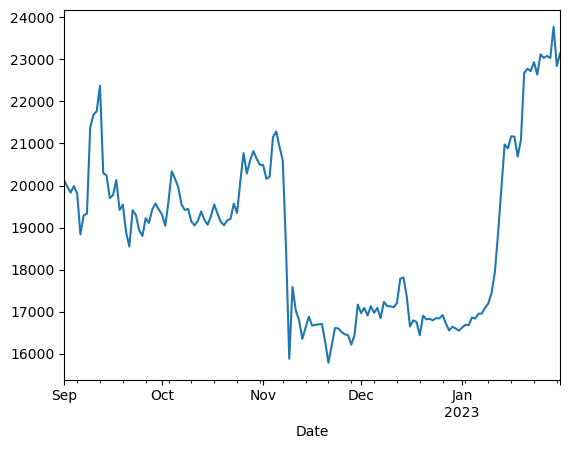

In [5]:
bitcoin['2022-09':'2023-01']['Close'].plot()


<AxesSubplot: xlabel='Date'>

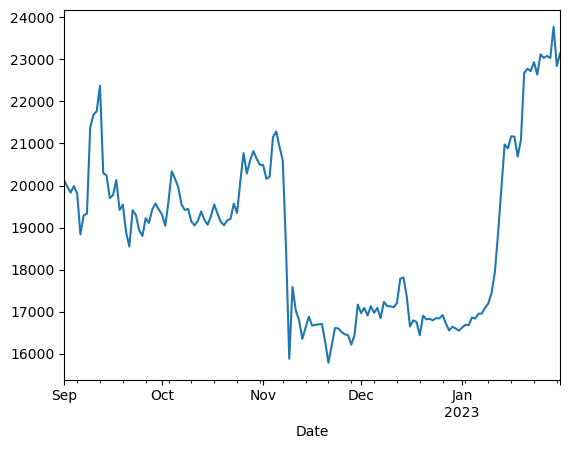

In [6]:
bitcoin.loc['2022-09':'2023-01', 'Close'].plot()

In [7]:
sample = 'M' # sample data by month => other values : W, 2W, 2M, D, etc ...
sampled_bitcoin = bitcoin['2022']['Close'].resample(sample)

/tmp/ipykernel_580205/3972022763.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  sampled_bitcoin = bitcoin['2022']['Close'].resample(sample)


Date
2022-01-31    AxesSubplot(0.125,0.11;0.775x0.77)
2022-02-28    AxesSubplot(0.125,0.11;0.775x0.77)
2022-03-31    AxesSubplot(0.125,0.11;0.775x0.77)
2022-04-30    AxesSubplot(0.125,0.11;0.775x0.77)
2022-05-31    AxesSubplot(0.125,0.11;0.775x0.77)
2022-06-30    AxesSubplot(0.125,0.11;0.775x0.77)
2022-07-31    AxesSubplot(0.125,0.11;0.775x0.77)
2022-08-31    AxesSubplot(0.125,0.11;0.775x0.77)
2022-09-30    AxesSubplot(0.125,0.11;0.775x0.77)
2022-10-31    AxesSubplot(0.125,0.11;0.775x0.77)
2022-11-30    AxesSubplot(0.125,0.11;0.775x0.77)
2022-12-31    AxesSubplot(0.125,0.11;0.775x0.77)
Freq: M, Name: Close, dtype: object

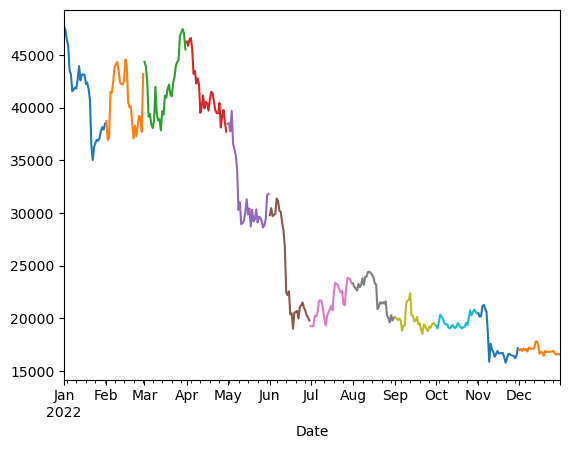

In [8]:
sampled_bitcoin.plot()

<AxesSubplot: xlabel='Date'>

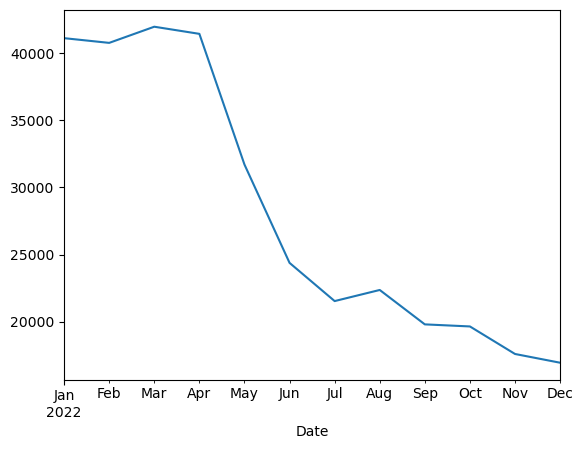

In [9]:
sampled_bitcoin.mean().plot()

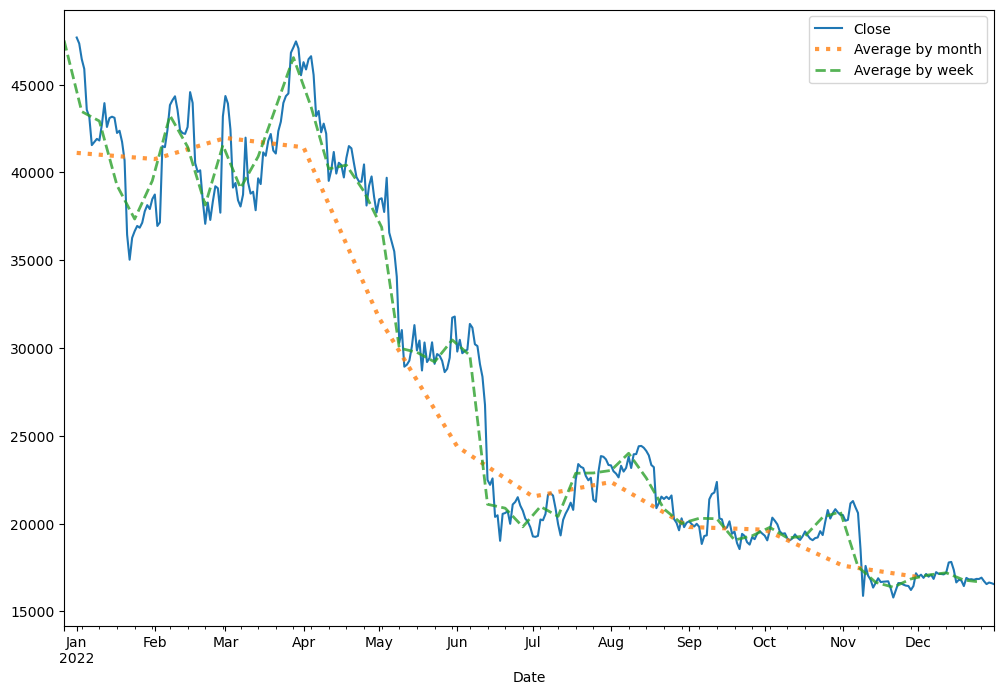

In [10]:
plt.figure(figsize=(12, 8))
bitcoin.loc['2022', 'Close'].plot()
bitcoin.loc['2022', 'Close'].resample('M').mean().plot(label = 'Average by month', lw=3, ls=':', alpha=0.8)
bitcoin.loc['2022', 'Close'].resample('W').mean().plot(label = 'Average by week', lw=2, ls='--', alpha=0.8)
plt.legend()
plt.show()

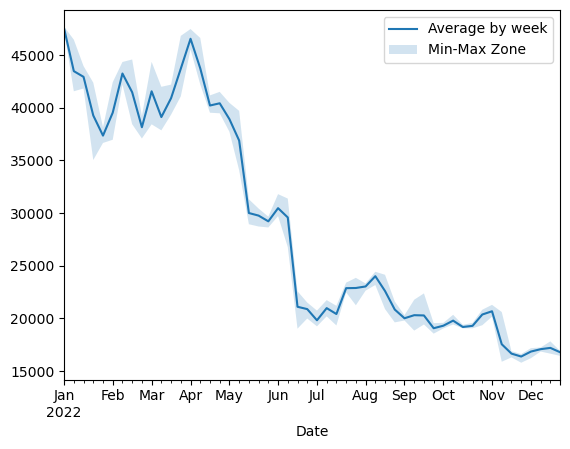

In [11]:
m = bitcoin.loc['2022', 'Close'].resample('W').agg(['mean', 'std', 'min', 'max'])

m.loc['2022', 'mean'].plot(label = 'Average by week')
plt.fill_between(m.index, m['min'], m['max'], label='Min-Max Zone',alpha=0.2)
plt.legend()

# Rolling

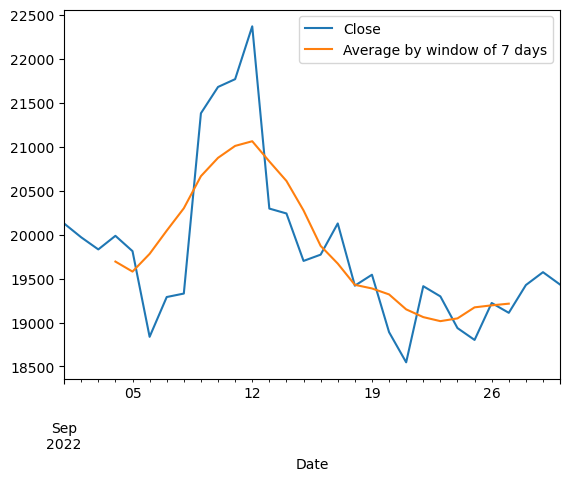

In [12]:
m = bitcoin.loc['2022-09', 'Close'].rolling(window=7, center=True).mean()
bitcoin.loc['2022-09', 'Close'].plot()
m.plot(label='Average by window of 7 days')
plt.legend()

# Exponential weighted average (Moyenne mobile exponentielle)

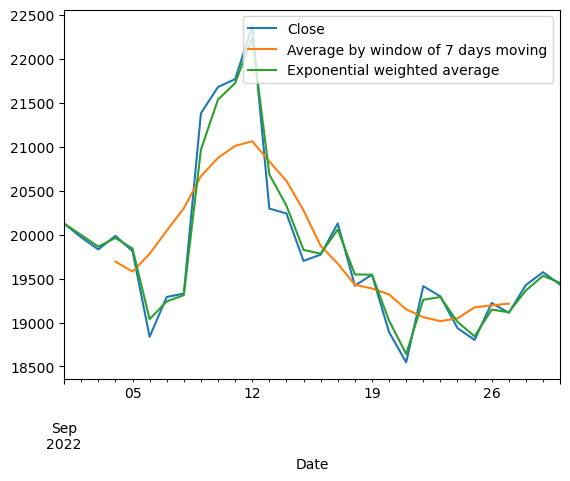

In [13]:
bitcoin.loc['2022-09', 'Close'].plot()
bitcoin.loc['2022-09', 'Close'].rolling(window=7, center=True).mean().plot(label='Average by window of 7 days moving')
bitcoin.loc['2022-09', 'Close'].ewm(alpha=0.8).mean().plot(label='Exponential weighted average')
plt.legend()

# Bitcoin VS ETH

In [14]:
eth = pd.read_csv("ETH-USD.csv", index_col='Date', parse_dates=True)
eth.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984


In [15]:
bitcoin.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [16]:
btc_eth = pd.merge(bitcoin, eth, on = 'Date', how='inner', suffixes=['_btc', '_eth'])
btc_eth.head()

,Open_btc,High_btc,Low_btc,Close_btc,Adj Close_btc,Volume_btc,Open_eth,High_eth,Low_eth,Close_eth,Adj Close_eth,Volume_eth
Date,,,,,,,,,,,,
2017-11-09,7446.830078,7446.830078,7101.520020,7143.580078,7143.580078,3226249984,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
2017-11-10,7173.729980,7312.000000,6436.870117,6618.140137,6618.140137,5208249856,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2017-11-11,6618.609863,6873.149902,6204.220215,6357.600098,6357.600098,4908680192,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
2017-11-12,6295.450195,6625.049805,5519.009766,5950.069824,5950.069824,8957349888,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
2017-11-13,5938.250000,6811.189941,5844.290039,6559.490234,6559.490234,6263249920,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984


array([<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>],
      dtype=object)

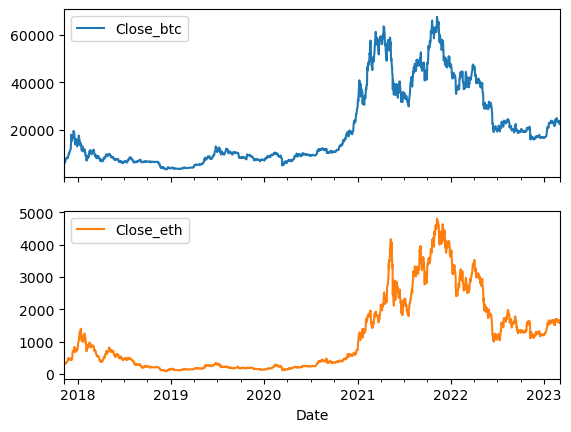

In [17]:
btc_eth[['Close_btc', 'Close_eth']].plot(subplots=True)

In [18]:
# Correlation BTC vs ETH

In [19]:
btc_eth[['Close_btc', 'Close_eth']].corr()

,Close_btc,Close_eth
Close_btc,1.000000,0.922545
Close_eth,0.922545,1.000000


# Trading Strategy : Example

In [23]:
data = bitcoin.copy()

In [41]:
data['Buy'] = np.zeros(len(data))
data['Sell'] = np.zeros(len(data))

data['MinRolling'] = data['Close'].shift(1).rolling(window=28).min()
data['MaxRolling'] = data['Close'].shift(1).rolling(window=28).max()
data.loc[data['MinRolling'] > data['Close'], 'Sell'] = -1
data.loc[data['MaxRolling'] < data['Close'], 'Buy'] = 1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/tmp/ipykernel_580205/583673632.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


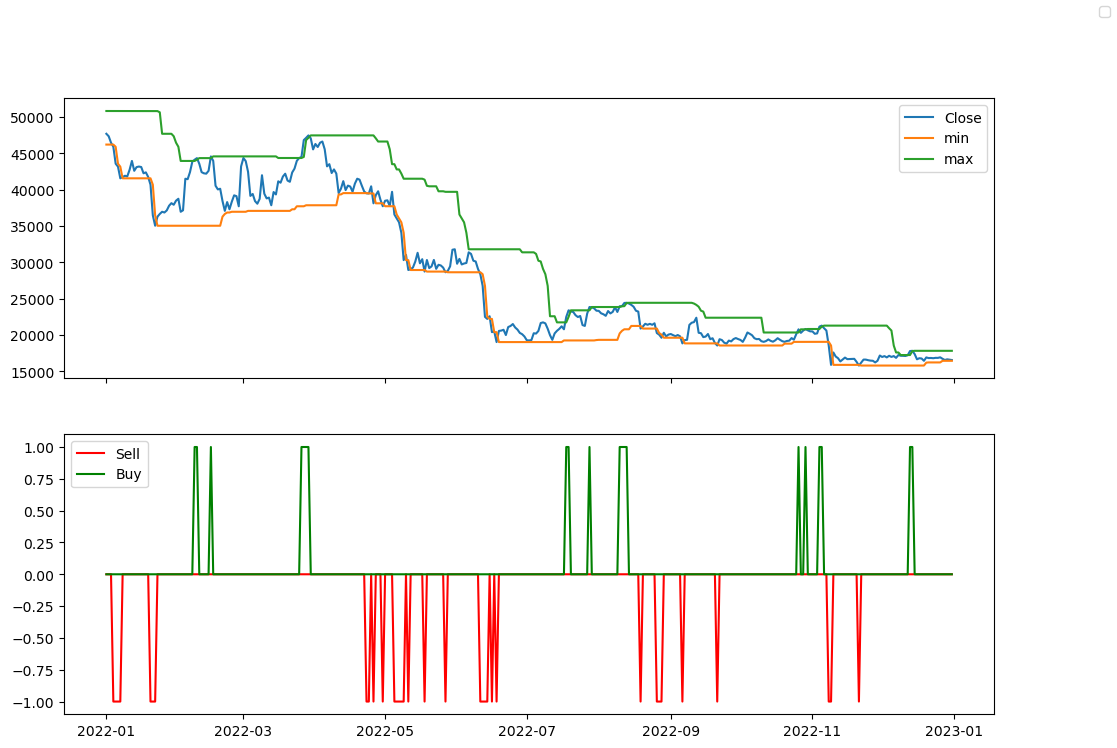

In [44]:
start = '2022'
end = '2022'
fig, ax = plt.subplots(2, figsize=(12, 8), sharex=True)
ax[0].plot(data.loc[start:end, 'Close'])
ax[0].plot(data.loc[start:end, 'MinRolling'])
ax[0].plot(data.loc[start:end, 'MaxRolling'])
ax[0].legend(['Close', 'min', 'max'])
ax[1].plot(data.loc[start:end, 'Sell'], c='r')
ax[1].plot(data.loc[start:end, 'Buy'], c='g')
ax[1].legend(['Sell', 'Buy'])
fig.legend()
fig.show()